## Observations and Insights 

In [ ]:
Observations: 
    
    1. The first observation that I noticed when analysing this data was that Capomulin was effective at lowering the 
       tumor volume over the specified timeframe in the data.
    2. There seems to be a corrilatoin between the overall Mouse weight and tumor size for mice on the drug Capomulin.
    3. The drug Capomulin study had the least ammount of varience among the rest of the drugs. 

In [221]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Pymaceuticals_df = pd.merge(mouse_metadata,study_results, how="outer" , on=["Mouse ID", "Mouse ID"])

Pymaceuticals_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [222]:
# Checking the number of mice in the DataFrame.
Pymaceuticals_count_df = len(Pymaceuticals_df["Mouse ID"].unique())
Pymaceuticals_count_df

249

In [223]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Pymaceuticals_sorted_df= Pymaceuticals_df.sort_values("Mouse ID", ascending=True)

Pymaceuticals_sorted_df.head(15)




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
456,a203,Infubinol,Female,20,23,10,51.852437,1
462,a203,Infubinol,Female,20,23,40,63.593490,2
463,a203,Infubinol,Female,20,23,45,67.973419,2
455,a203,Infubinol,Female,20,23,5,48.508468,0
454,a203,Infubinol,Female,20,23,0,45.000000,0


In [224]:
# Optional: Get all the data for the duplicate mouse ID. 
Pymaceuticals_sorted_df["Mouse ID"].count()

1893

In [225]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Pymaceuticals_clean_df = Pymaceuticals_sorted_df.drop_duplicates(subset =["Mouse ID", "Timepoint"])


Pymaceuticals_clean_df.head(15)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
456,a203,Infubinol,Female,20,23,10,51.852437,1
462,a203,Infubinol,Female,20,23,40,63.593490,2
463,a203,Infubinol,Female,20,23,45,67.973419,2
455,a203,Infubinol,Female,20,23,5,48.508468,0
454,a203,Infubinol,Female,20,23,0,45.000000,0


In [226]:
# Checking the number of mice in the clean DataFrame.
Pymaceuticals_clean_df["Mouse ID"].count()

1888

## Summary Statistics

In [227]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Pymaceuticals_gb = Pymaceuticals_clean_df.groupby(["Drug Regimen"])

Tmean = Pymaceuticals_gb["Tumor Volume (mm3)"].mean()
Tmedian = Pymaceuticals_gb["Tumor Volume (mm3)"].median()
Tvariance = Pymaceuticals_gb["Tumor Volume (mm3)"].var() 
Tsd = Pymaceuticals_gb["Tumor Volume (mm3)"].std() 
Tsem = Pymaceuticals_gb["Tumor Volume (mm3)"].sem()



# This method is the most straightforward, creating multiple series and putting them all together at the end.


Pymaceuticals_Summary_df = pd.DataFrame({"Mean Tumor Volume": Tmean,
                                         "Median Tumor Volume": Tmedian, 
                                         "Tumor Volume Variance": Tvariance, 
                                         "Tumor Volume Std. Dev.": Tsd, 
                                         "Tumor Volume Std.Err": Tsem})

Pymaceuticals_Summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.389178,50.909965,43.116372,6.566306,0.525725
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [228]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.


groupedstats_df = Pymaceuticals_clean_df.groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
groupedstats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.389178,50.909965,43.116372,6.566306,0.525725
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0.5, 1.0, 'Number of Mice per Treatment')

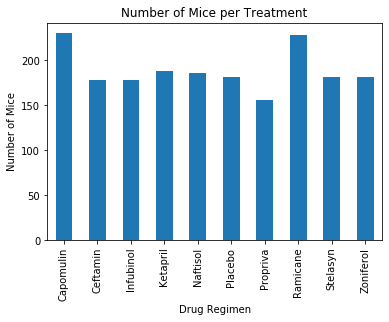

In [229]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
treatment_gb = Pymaceuticals_clean_df.groupby(["Drug Regimen"])
treatment_count_gb = treatment_gb["Mouse ID"].count() 
treatment_count_gb.plot(kind="bar")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")


Text(0.5, 1.0, 'Number of Mice per Treatment')

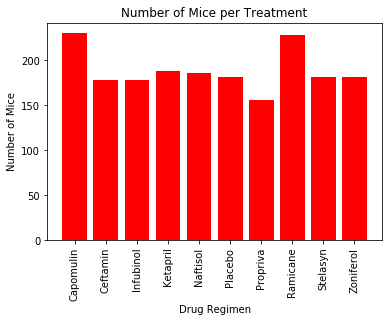

In [230]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
clean_gb = Pymaceuticals_clean_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
clean_df = pd.DataFrame(clean_gb)
reset_clean = clean_df.reset_index()


x_axis = np.arange(len(treatment_count_gb))
ticks = [x for x in x_axis]


plt.bar(x_axis,clean_df["Tumor Volume (mm3)"], color="r") 
plt.xticks(ticks, reset_clean["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

## Pie Plots

Text(0, 0.5, 'Sex')

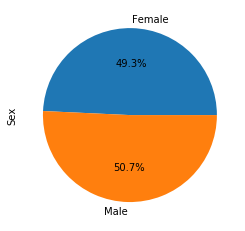

In [231]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_gb = Pymaceuticals_clean_df.groupby(["Sex"])
pie_count_gb = pie_gb["Mouse ID"].count() 
pie_count_gb.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("Sex")


Text(0, 0.5, 'Sex')

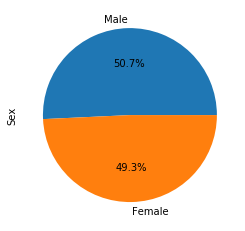

In [232]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male","Female"]     
gender_count = Pymaceuticals_clean_df["Sex"].value_counts()

plt.pie(gender_count, labels=gender, autopct="%1.1f%%") 
plt.ylabel("Sex")



## Quartiles, Outliers and Boxplots

In [233]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Tumor Volume (mm3)
topfour_df = Pymaceuticals_clean_df.loc[(Pymaceuticals_clean_df["Drug Regimen"] == "Capomulin") | (
    Pymaceuticals_clean_df["Drug Regimen"] == "Ramicane") | (Pymaceuticals_clean_df["Drug Regimen"] == "Infubinol") | (Pymaceuticals_clean_df["Drug Regimen"] == "Ceftamin"), :]


Capomulin_df = topfour_df.loc[topfour_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = topfour_df.loc[topfour_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df = topfour_df.loc[topfour_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = topfour_df.loc[topfour_df["Drug Regimen"] == "Ceftamin",:]
                              
quartiles = topfour_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

Values below 25.02 could be outliers.
Values above 65.56 could be outliers.


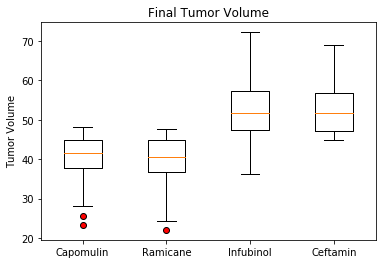

In [140]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_cir = dict(markerfacecolor='r', marker='o')

data = [Capomulin_df["Tumor Volume (mm3)"], Ramicane_df["Tumor Volume (mm3)"], Infubinol_df["Tumor Volume (mm3)"],Ceftamin_df["Tumor Volume (mm3)"]]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(data,flierprops=red_cir)
plt.xticks([1, 2, 3,4], ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
plt.show()





## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

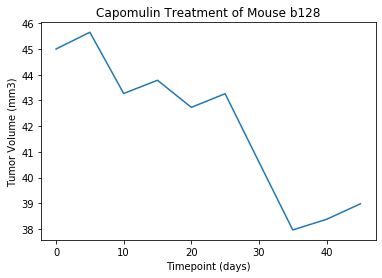

In [164]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse = "b128"
mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == mouse,:]
mouse_df = mouse_df.sort_values(by=['Timepoint'])
x_axis = mouse_df["Timepoint"]
y_axis = mouse_df["Tumor Volume (mm3)"]

plt.plot(x_axis,y_axis)
plt.title("Capomulin Treatment of Mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

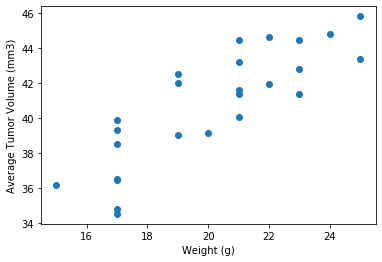

In [185]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avecap_df = Capomulin_df.groupby(["Mouse ID"]).mean()      
x_values = avecap_df["Weight (g)"] 
y_values = avecap_df["Tumor Volume (mm3)"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

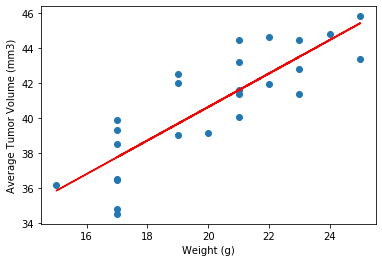

In [186]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

avecap_df = Capomulin_df.groupby(["Mouse ID"]).mean()  
x_values = avecap_df["Weight (g)"] 
y_values = avecap_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


